In [1]:
!pip install pyspark
!pip install seaborn
!pip install pandas
!pip install setuptools


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


*Khởi tạo phiên Spark sử dụng SparkSession*
1. SparkSession là điểm kết nối để làm việc với Dataframe và SQL trong Spark
2. .master("local[1]"): Chỉ định spark chạy local với 1 core(1 lõi CPU). Dùng local[*] để sử dụng tất cả các core có sẵn
3. appname: Tên ứng dụng Spark


In [2]:
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[1]") \
                    .appName('SparkByExamples.com') \
                    .getOrCreate()

*Đọc dữ liệu từ file superstore.csv vào DataFrame df*

In [ ]:
df = spark.read.csv("D:\PYSPARK_DOCUMENT\\superstore.csv", 
                    header=True, 
                    inferSchema=True) 

In [4]:
df.show(5)

+---------------+-----------+-------------+----------+----------------+--------+------+----------+--------------+-------------+---------------+--------------------+-------+--------+------+-----+-----+--------+----------+--------------+------------+----------+-----------+----+-------------+-------+
|       Category|       City|      Country|CustomerID|    CustomerName|Discount|Market| OrderDate|       OrderID|OrderPriority|      ProductID|         ProductName| Profit|Quantity|Region|RowID|Sales| Segment|  ShipDate|      ShipMode|ShippingCost|     State|SubCategory|Year|      Market2|weeknum|
+---------------+-----------+-------------+----------+----------------+--------+------+----------+--------------+-------------+---------------+--------------------+-------+--------+------+-----+-----+--------+----------+--------------+------------+----------+-----------+----+-------------+-------+
|Office Supplies|Los Angeles|United States| LS-172304|Lycoris Saunders|       0|    US|2011-01-07|CA-20

Đếm số lượng giá trị null ở từng cột trong dataframe

In [5]:
from pyspark.sql.functions import col, sum

# Đếm số giá trị null ở mỗi cột
null_counts = df.select([sum(col(column).isNull().cast("int")).alias(column) for column in df.columns])

# Hiển thị kết quả
null_counts.show()

+--------+----+-------+----------+------------+--------+------+---------+-------+-------------+---------+-----------+------+--------+------+-----+-----+-------+--------+--------+------------+-----+-----------+----+-------+-------+
|Category|City|Country|CustomerID|CustomerName|Discount|Market|OrderDate|OrderID|OrderPriority|ProductID|ProductName|Profit|Quantity|Region|RowID|Sales|Segment|ShipDate|ShipMode|ShippingCost|State|SubCategory|Year|Market2|weeknum|
+--------+----+-------+----------+------------+--------+------+---------+-------+-------------+---------+-----------+------+--------+------+-----+-----+-------+--------+--------+------------+-----+-----------+----+-------+-------+
|       0|   0|      0|         0|           0|       0|     0|        0|      0|            0|        0|          0|     0|       0|     0|    0|    0|      0|       0|       0|           0|    0|          0|   0|      0|      0|
+--------+----+-------+----------+------------+--------+------+---------+---

In [6]:
# In ra schema của DataFrame
df.printSchema()

root
 |-- Category: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- CustomerName: string (nullable = true)
 |-- Discount: integer (nullable = true)
 |-- Market: string (nullable = true)
 |-- OrderDate: date (nullable = true)
 |-- OrderID: string (nullable = true)
 |-- OrderPriority: string (nullable = true)
 |-- ProductID: string (nullable = true)
 |-- ProductName: string (nullable = true)
 |-- Profit: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- RowID: string (nullable = true)
 |-- Sales: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- ShipDate: string (nullable = true)
 |-- ShipMode: string (nullable = true)
 |-- ShippingCost: string (nullable = true)
 |-- State: string (nullable = true)
 |-- SubCategory: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Market2: string (nullable = true)


**1.Tổng quan doanh thu hàng tháng: Tính tổng doanh thu cho từng tháng trong năm:**
Dùng groupBy() để nhóm dữ liệu theo năm và tháng từ cột OrderDate, sau đó dùng agg() với sum("Sales") để tính tổng doanh thu hàng tháng

In [7]:
# Thêm gói pyspark
from pyspark.sql import functions as F

# Chuyển kiểu dữ liệu sang date
df = df.withColumn("`OrderDate`", F.to_date(F.col("`OrderDate`"), "yyyy-MM-dd"))

# Tính tổng doanh thu hàng tháng
monthly_sales = df.groupBy(
    F.year("`OrderDate`").alias("Year"),
    F.month("`OrderDate`").alias("Month")
).agg(
    F.sum("Sales").alias("Total Sales")
).orderBy("Year", "Month")
print('Tổng doanh thu theo tháng')
monthly_sales.show()

Tổng doanh thu theo tháng
+----+-----+-----------+
|Year|Month|Total Sales|
+----+-----+-----------+
|2011|    1|   277864.0|
|2011|    2|   168114.0|
|2011|    3|   261895.0|
|2011|    4|   182323.0|
|2011|    5|   182691.0|
|2011|    6|   256268.0|
|2011|    7|   331816.0|
|2011|    8|   312457.0|
|2011|    9|   518107.0|
|2011|   10|   389135.0|
|2011|   11|   552657.0|
|2011|   12|   517908.0|
|2012|    1|   173049.0|
|2012|    2|   172648.0|
|2012|    3|   315692.0|
|2012|    4|   227205.0|
|2012|    5|   430974.0|
|2012|    6|   400850.0|
|2012|    7|   291835.0|
|2012|    8|   410835.0|
+----+-----+-----------+
only showing top 20 rows



1. Vẽ đồ thị tổng doanh thu hàng tháng

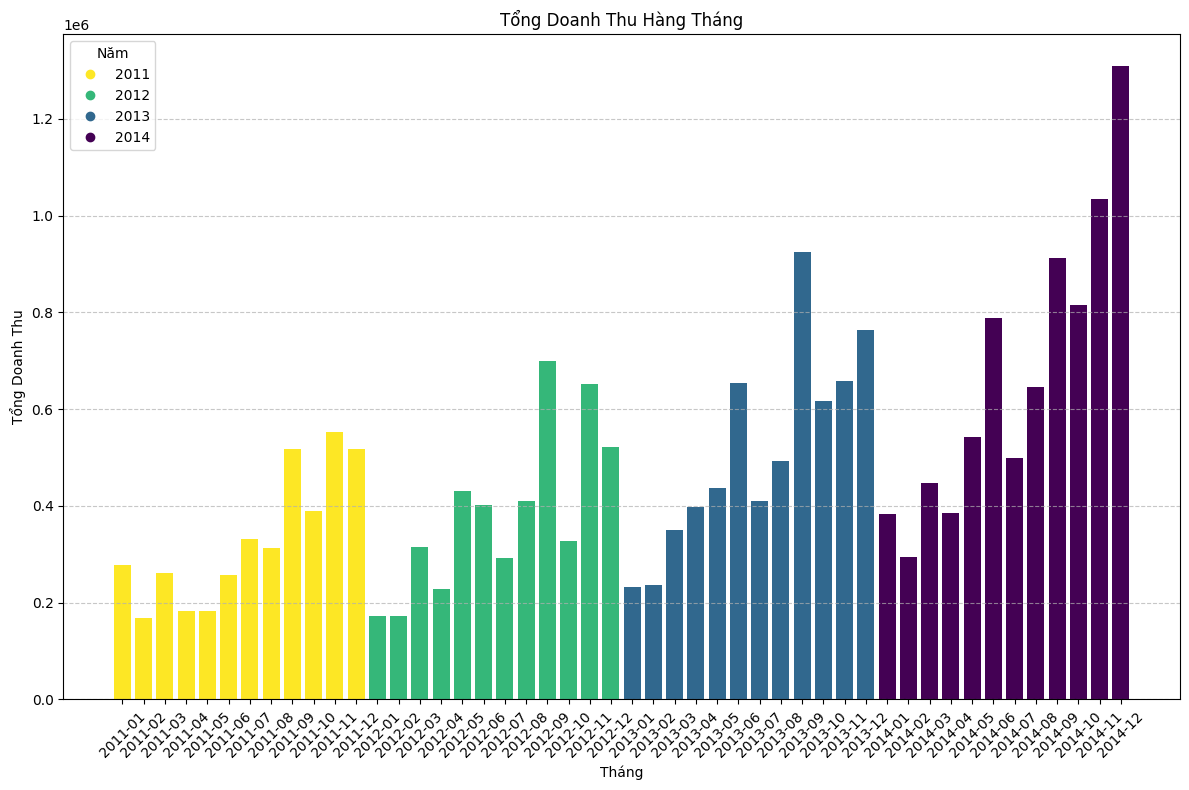

In [8]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
# Chuyển về danh sách(list)
monthly_data = monthly_sales.collect()

# Chuẩn bị dữ liệu cho biểu đồ
years = [row['Year'] for row in monthly_data]
months = [row['Month'] for row in monthly_data]
total_sales = [row['Total Sales'] for row in monthly_data]
dates = [f"{year}-{month:02d}" for year, month in zip(years, months)]

# Tạo một danh sách màu cho mỗi năm
unique_years = sorted(set(years))
colors = plt.cm.viridis_r(np.linspace(0, 1, len(unique_years)))
color_map = {year: colors[i] for i, year in enumerate(unique_years)}

# Áp dụng màu cho từng cột dựa trên năm
bar_colors = [color_map[year] for year in years]

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))
plt.bar(dates, total_sales, color=bar_colors)
plt.title('Tổng Doanh Thu Hàng Tháng')
plt.xlabel('Tháng')
plt.ylabel('Tổng Doanh Thu')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Tạo chú thích cho các năm
handles = [plt.Line2D([0], [0], color=color_map[year], marker='o', linestyle='', label=str(year)) for year in unique_years]
plt.legend(handles=handles, title="Năm")

plt.show()


**2. Phân tích khách hàng theo quốc gia: Xác định quốc gia nào có số lượng khách hàng lớn nhất, và doanh thu từ quốc gia đó:**
Đếm số lượng khách hàng và tổng doanh thu theo quốc gia: Dùng groupBy() để nhóm dữ liệu theo cột Country. agg() và countDistinct("CustomerID") đếm số lượng khách hàng duy nhất cho mỗi quốc gia, sắp xếp theo số lượng khách giảm giần orderBy()


In [9]:
from pyspark.sql.functions import countDistinct, sum as spark_sum

# Đếm số lượng khách hàng và tính tổng doanh thu theo quốc gia
country_analysis = df.groupBy("Country") \
                     .agg(countDistinct("`CustomerID`").alias("Customer_Count"),
                          spark_sum("Sales").alias("Total_Sales")) \
                     .orderBy("Customer_Count", ascending=False)

# Hiển thị quốc gia có số lượng khách hàng lớn nhất và doanh thu từ quốc gia đó
print('Quốc gia có số lượng khách hàng lớn nhất')
top_country = country_analysis.limit(1)
country_analysis.show()
top_country.show()

Quốc gia có số lượng khách hàng lớn nhất
+------------------+--------------+-----------+
|           Country|Customer_Count|Total_Sales|
+------------------+--------------+-----------+
|     United States|           793|1.2465633E7|
|            France|           679|   858930.0|
|            Mexico|           670|   622620.0|
|         Australia|           660|   925257.0|
|           Germany|           582|   628857.0|
|             China|           549|   700591.0|
|    United Kingdom|           529|   528570.0|
|             India|           494|   589664.0|
|            Brazil|           472|   361098.0|
|         Indonesia|           469|   404887.0|
|            Turkey|           463|   108524.0|
|             Italy|           376|   289717.0|
|             Spain|           337|   287162.0|
|           Nigeria|           332|    54347.0|
|Dominican Republic|           303|   126137.0|
|       El Salvador|           299|   177565.0|
|              Cuba|           296|   158861.0|

**3. Phân tích sản phẩm bán chạy: Xác định các sản phẩm bán chạy nhất theo số lượng và giá trị bán ra:**
- 10 sản phẩm theo số lượng: Nhóm dữ liệu theo ProductName, tính tổng số lượng bán cho mỗi sản phẩm, sắp xếp sản phẩm theo số lượng bán giảm dần

In [10]:
from pyspark.sql.functions import sum as spark_sum

# Lọc các giao dịch có số lượng lớn hơn 0 (các giao dịch có số lượng bị âm là các giao dịch bị hủy)
filtered_df = df.filter(df["Quantity"] > 0)

# Lấy ra 10 sản phẩm bán chạy nhất theo số lượng
top_10_products_quantity = filtered_df.groupBy("`ProductName`") \
                                      .agg(spark_sum("Quantity").alias("Total_Quantity")) \
                                      .orderBy("Total_Quantity", ascending=False) \
                                      .limit(10)

# Lấy ra 10 sản phẩm bán chạy nhất theo giá trị bán ra
top_10_products_sales = filtered_df.groupBy("`ProductName`") \
                                   .agg(spark_sum("Sales").alias("Total_Sales")) \
                                   .orderBy("Total_Sales", ascending=False) \
                                   .limit(10)
print('Top 10 theo số lượng')
top_10_products_quantity.show()
print('Top 10 theo giá trị')
top_10_products_sales.show()


Top 10 theo số lượng
+--------------------+------------------+
|         ProductName|    Total_Quantity|
+--------------------+------------------+
|             Staples|             876.0|
|Wilson Jones Ledg...|440.94480000000004|
|"Tyvek Interoffic...|          421.9816|
|Cardinal Index Ta...|             337.0|
|Eldon File Cart, ...|             321.0|
|Rogers File Cart,...|             262.0|
|"Xerox Color Copi...|260.83279999999996|
|Sanford Pencil Sh...|             259.0|
|Stockwell Paper C...|             253.0|
|Avery Index Tab, ...|             252.0|
+--------------------+------------------+

Top 10 theo giá trị
+--------------------+-----------+
|         ProductName|Total_Sales|
+--------------------+-----------+
|"Adams Telephone ...|   616817.0|
|"Acco Pressboard ...|   381723.0|
|"Wirebound Messag...|   331991.0|
|"Acco Pressboard ...|   324407.0|
|"REDIFORM Incomin...|   297264.0|
|"Ampad Gold Fibre...|   293893.0|
|"Acme Hot Forged ...|   270191.0|
|Wilson Jones Ledg..

Vẽ biểu đồ cột thể hiện 10 sản phẩm bán chạy nhất dựa trên số lượng và doanh thu

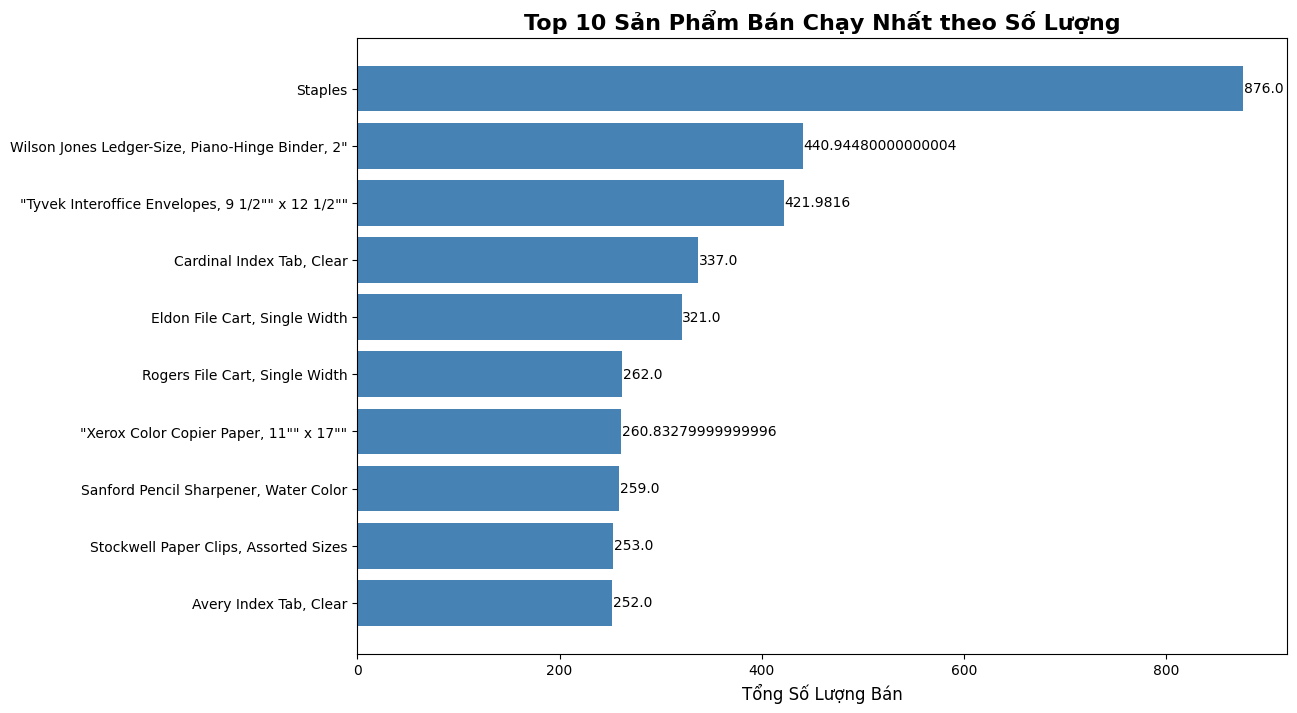

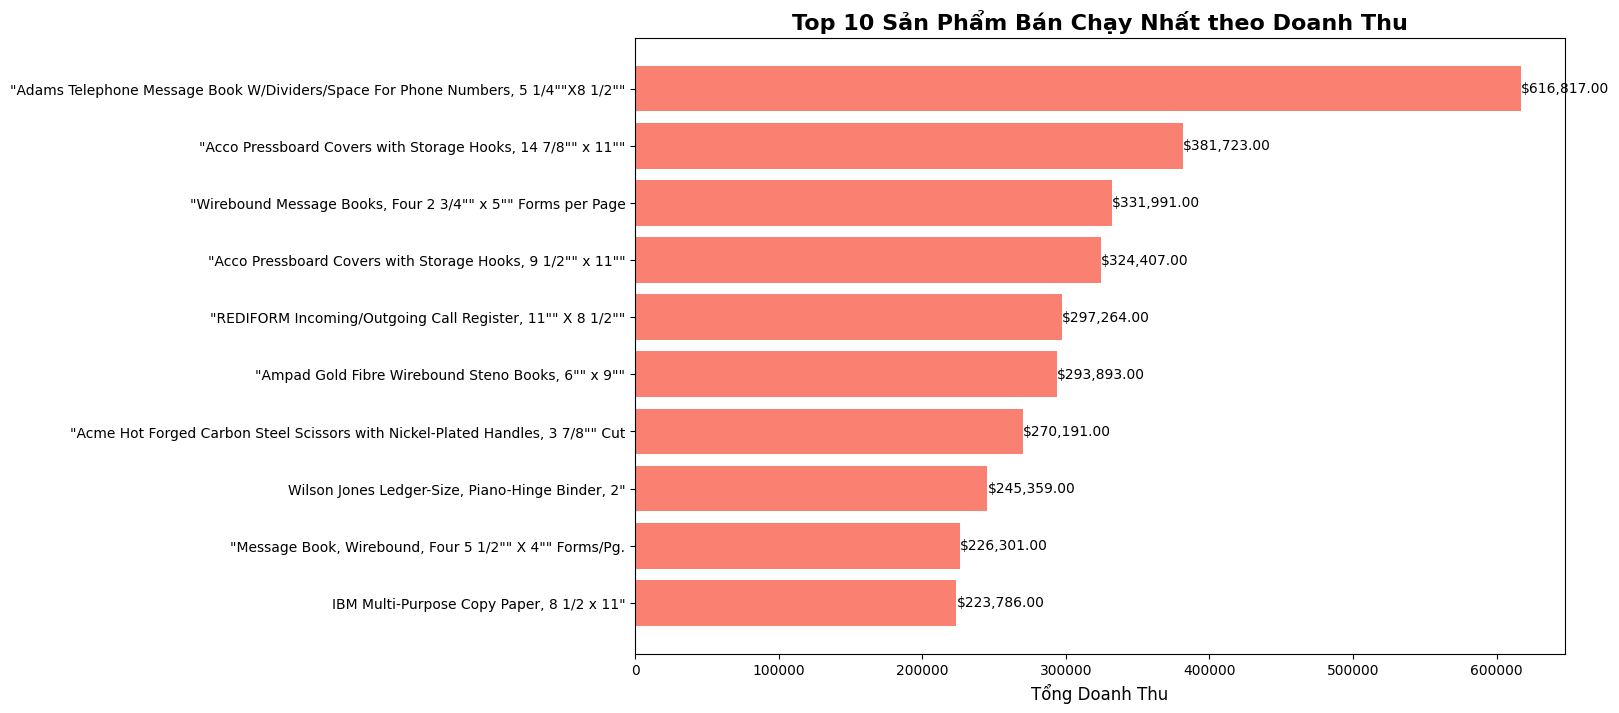

In [11]:
import matplotlib.pyplot as plt
# Lấy dữ liệu từ dataframe chuyển thành danh sách dễ xử lý trong python
top_quantity_data = top_10_products_quantity.collect()
top_sales_data = top_10_products_sales.collect()

# Sản phẩm bán chạy nhất theo số lượng
products_quantity = [row['ProductName'] for row in top_quantity_data]
quantities = [row['Total_Quantity'] for row in top_quantity_data]

# Sản phẩm bán chạy nhất theo giá trị bán ra
products_sales = [row['ProductName'] for row in top_sales_data]
sales = [row['Total_Sales'] for row in top_sales_data]

# Vẽ biểu đồ cột cho các sản phẩm bán chạy nhất theo số lượng
plt.figure(figsize=(12, 8))
bars = plt.barh(products_quantity, quantities, color='steelblue')
plt.xlabel('Tổng Số Lượng Bán', fontsize=12)
plt.title('Top 10 Sản Phẩm Bán Chạy Nhất theo Số Lượng', fontsize=16, fontweight='bold')
# Đảo ngược trục y để sản phẩm bán chạy nhất nằm ở trên cùng
plt.gca().invert_yaxis()

# Thêm giá trị trên từng thanh
for bar, quantity in zip(bars, quantities):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             f'{quantity}', va='center', fontsize=10)

plt.show()

# Vẽ biểu đồ cột cho các sản phẩm bán chạy nhất theo giá trị bán ra
plt.figure(figsize=(12, 8))
bars = plt.barh(products_sales, sales, color='salmon')
plt.xlabel('Tổng Doanh Thu', fontsize=12)
plt.title('Top 10 Sản Phẩm Bán Chạy Nhất theo Doanh Thu', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()

# Thêm giá trị trên từng thanh
for bar, sale in zip(bars, sales):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             f'${sale:,.2f}', va='center', fontsize=10)
# f'${sale:,.2f}': Hiển thị doanh thu với định dạng số thập phân và dấu phẩy (ví dụ: $1,234.56)
plt.show()


**4.Phân tích tỉ lệ giữ chân khách hàng: Tính toán tỷ lệ giữ chân khách hàng trong năm (tỷ lệ khách hàng quay lại mua hàng):**


In [12]:
from pyspark.sql import functions as F

df = df.withColumn("Order Date", F.to_date(df["OrderDate"], "yyyy-MM-dd"))

# Thêm cột năm để phân tích theo năm
df = df.withColumn("Year", F.year("Order Date"))

# Đếm tổng số khách hàng duy nhất theo từng năm
total_customers_per_year = df.groupBy("Year") \
                             .agg(F.countDistinct("`CustomerID`").alias("Total_Customers"))
#total_customers_per_year.show()

# Xác định khách hàng quay lại mua hàng trong năm, là các khách hàng có số lượng OrderID > 1 trong 1 năm
repeat_customers = df.groupBy("Year", "`CustomerID`") \
                     .agg(F.count("`OrderID`").alias("Purchase_Count")) \
                     .filter(F.col("Purchase_Count") > 1) \
                     .groupBy("Year") \
                     .agg(F.count("`CustomerID`").alias("Repeat_Customers"))
#repeat_customers.show()
# Kết hợp để tính tỷ lệ giữ chân khách hàng
retention_rate = total_customers_per_year.join(repeat_customers, "Year", "left") \
                                         .withColumn("Retention_Rate", 
                                                    (F.col("Repeat_Customers") / F.col("Total_Customers")) * 100) \
                                         .select("Year", "Total_Customers", "Repeat_Customers", "Retention_Rate")

# Hiển thị kết quả
print('Tỷ lệ giữ chân khách hàng theo năm')
retention_rate.show()


Tỷ lệ giữ chân khách hàng theo năm
+----+---------------+----------------+-----------------+
|Year|Total_Customers|Repeat_Customers|   Retention_Rate|
+----+---------------+----------------+-----------------+
|2013|           3591|            2762|76.91450849345586|
|2014|           3948|            3213|81.38297872340425|
|2012|           3121|            2309|73.98269785325216|
|2011|           2890|            1982|68.58131487889273|
+----+---------------+----------------+-----------------+



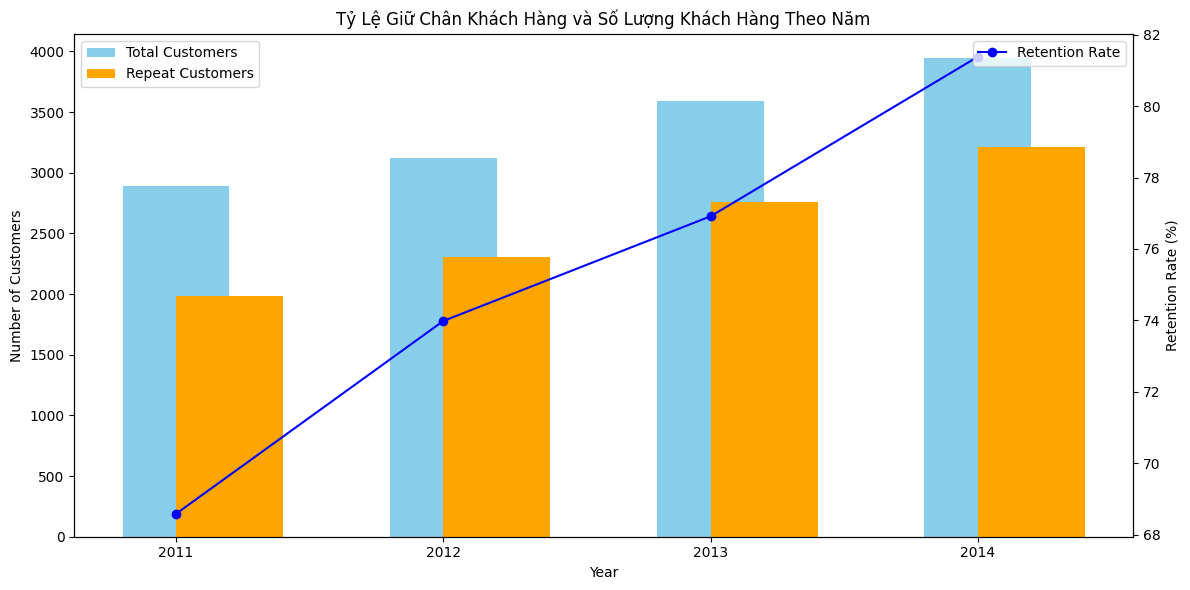

In [13]:
retention_data = retention_rate.orderBy("Year").collect()

# Chuẩn bị dữ liệu
years = [row['Year'] for row in retention_data]
total_customers = [row['Total_Customers'] for row in retention_data]
repeat_customers = [row['Repeat_Customers'] for row in retention_data]
retention_rates = [row['Retention_Rate'] for row in retention_data]

# Tạo một biểu đồ với hai trục y
fig, ax1 = plt.subplots(figsize=(12, 6))

# Trục Y đầu tiên cho Total_Customers và Repeat_Customers
ax1.bar(years, total_customers, width=0.4, label='Total Customers', color='skyblue', align='center')
ax1.bar(years, repeat_customers, width=0.4, label='Repeat Customers', color='orange', align='edge')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Customers')
ax1.set_title('Tỷ Lệ Giữ Chân Khách Hàng và Số Lượng Khách Hàng Theo Năm')
ax1.set_xticks(years)
ax1.legend(loc='upper left')

# Trục Y thứ hai cho Retention_Rate
ax2 = ax1.twinx()
ax2.plot(years, retention_rates, marker='o', color='b', linestyle='-', label='Retention Rate')
ax2.set_ylabel('Retention Rate (%)')

ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

5. Đánh giá lợi nhuận theo danh mục sản phẩm: Tính toán lợi nhuận theo từng danh mục sản phẩm.

In [14]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum as spark_sum
'''
spark = SparkSession.builder \
    .appName("Profit Analysis by Product Category") \
    .getOrCreate()
'''
# Tính tổng lợi nhuận theo từng danh mục sản phẩm
profit_by_category = df.groupBy("Category") \
    .agg(spark_sum("Profit").alias("Total_Profit")) \
    .orderBy("Total_Profit", ascending=False)

print('Lợi nhuận theo danh mục')
profit_by_category.show()


Lợi nhuận theo danh mục
+---------------+-----------------+
|       Category|     Total_Profit|
+---------------+-----------------+
|     Technology|663710.8816800003|
|Office Supplies|516472.9199000008|
|      Furniture|283734.2221999993|
+---------------+-----------------+



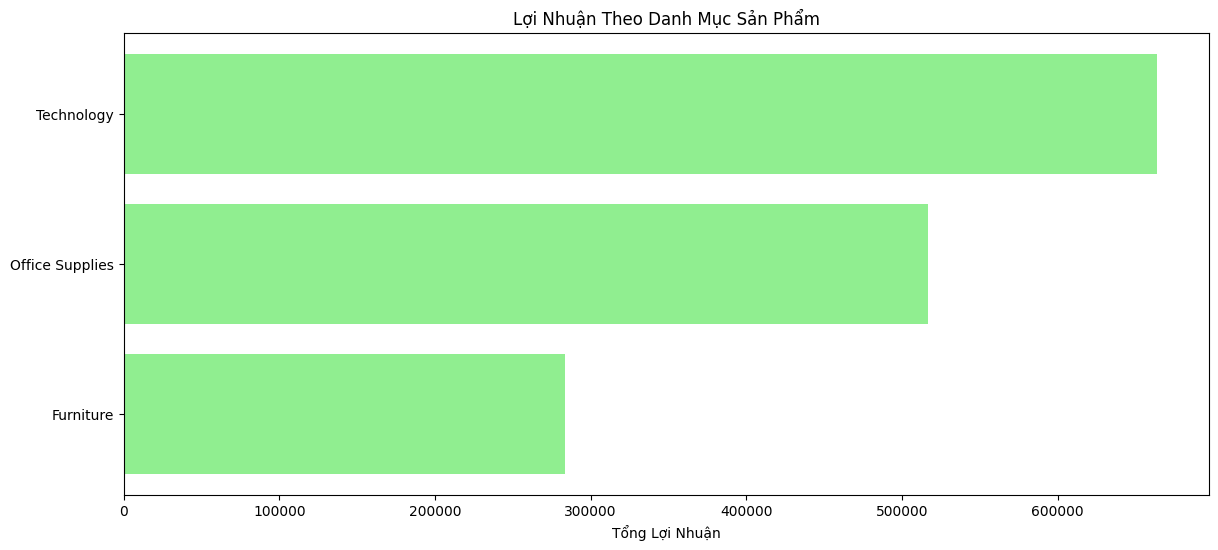

In [15]:
import matplotlib.pyplot as plt

profit_data = profit_by_category.collect()

categories = [row['Category'] for row in profit_data]
profits = [row['Total_Profit'] for row in profit_data]

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))
plt.barh(categories, profits, color='lightgreen')
plt.xlabel('Tổng Lợi Nhuận')
plt.title('Lợi Nhuận Theo Danh Mục Sản Phẩm')
plt.gca().invert_yaxis()
plt.show()


In [16]:
spark.stop()
